# Import libraries

In [277]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read csv file

In [278]:
data = pd.read_csv("medical insurance dataset.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [279]:
data.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [280]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [281]:
data.describe(include = 'object'). T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [282]:
data.duplicated().sum()

1

In [283]:
duplicates = data[data.duplicated()]
print(duplicates)  # View any duplicate rows

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [284]:
data.drop_duplicates(inplace = True)

In [285]:
print(data.shape)  


(1337, 7)


In [286]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visual of Numeric Columns

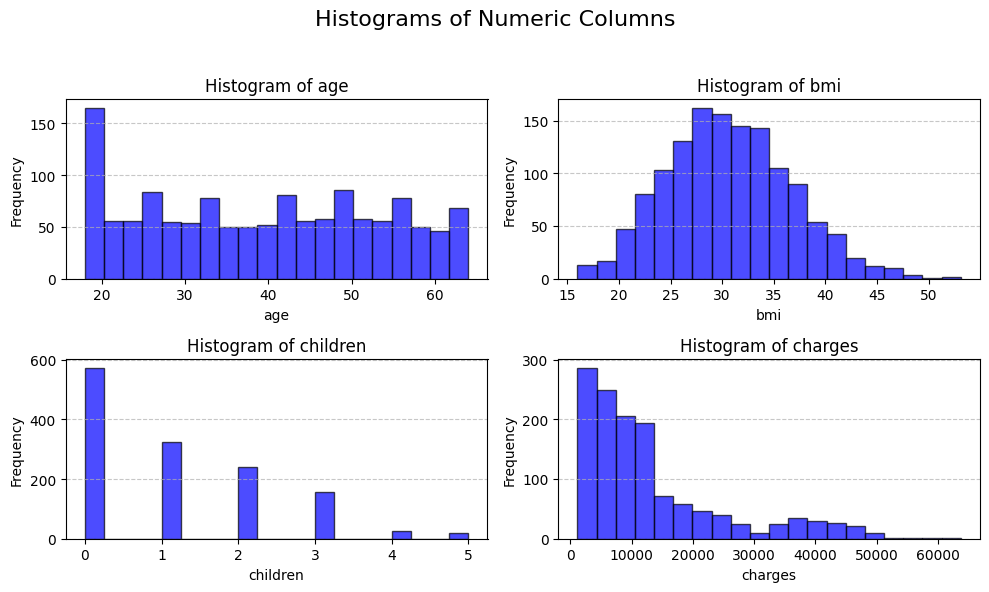

In [287]:
import matplotlib.pyplot as plt

# Selecting numeric columns for histogram plotting
numeric_columns = ["age", "bmi", "children", "charges"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)

# histograms for each numeric column
for ax, column in zip(axes.ravel(), numeric_columns):
    ax.hist(data[column], bins=20, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Charges by BMI and Smoker Status

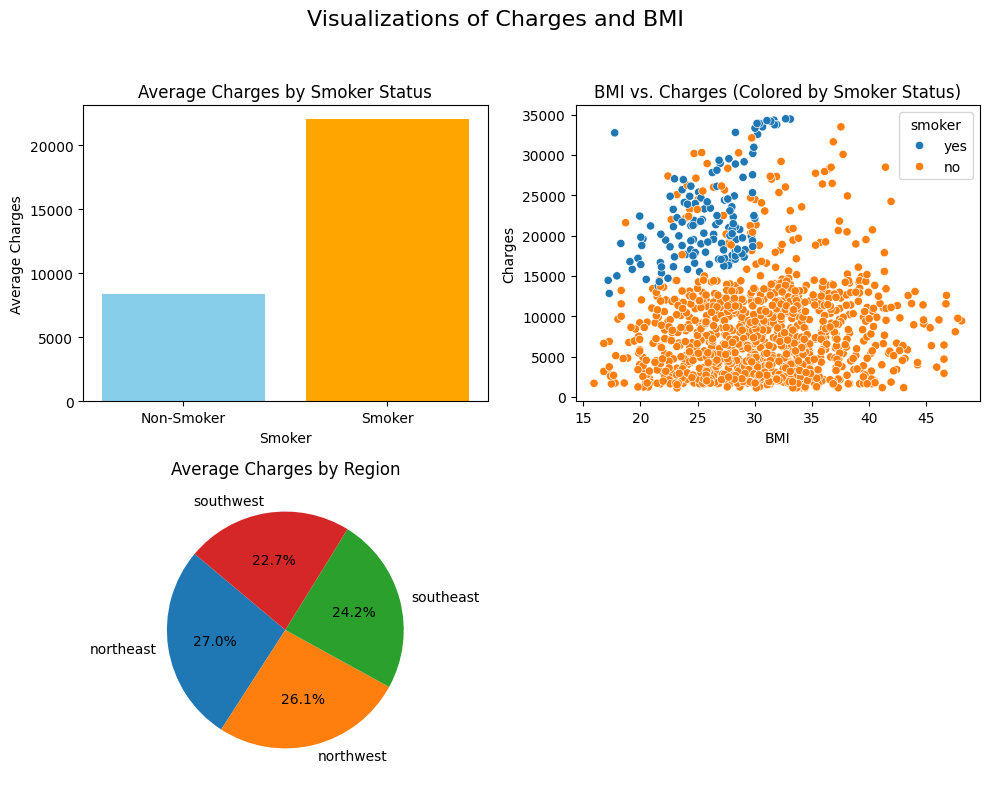

In [288]:
import seaborn as sns
# Group the data by 'smoker' and calculate the mean charges
smoker_charges = data_cleaned.groupby('smoker')['charges'].mean()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Visualizations of Charges and BMI', fontsize=16)

# Bar Chart: Average Charges by Smoker Status
axes[0, 0].bar(smoker_charges.index, smoker_charges, color=['skyblue', 'orange'])
axes[0, 0].set_title('Average Charges by Smoker Status')
axes[0, 0].set_xlabel('Smoker')
axes[0, 0].set_ylabel('Average Charges')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Non-Smoker', 'Smoker'])

# Scatter Plot: BMI vs. Charges
sns.scatterplot(ax=axes[0, 1], x='bmi', y='charges', hue='smoker', data=data_cleaned)
axes[0, 1].set_title('BMI vs. Charges (Colored by Smoker Status)')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')

# Pie Chart: Average Charges by Region
charges_by_region = data_cleaned.groupby('region')['charges'].mean()
axes[1, 0].pie(charges_by_region, labels=charges_by_region.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Average Charges by Region')

# Empty subplot to balance layout
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# check outliers

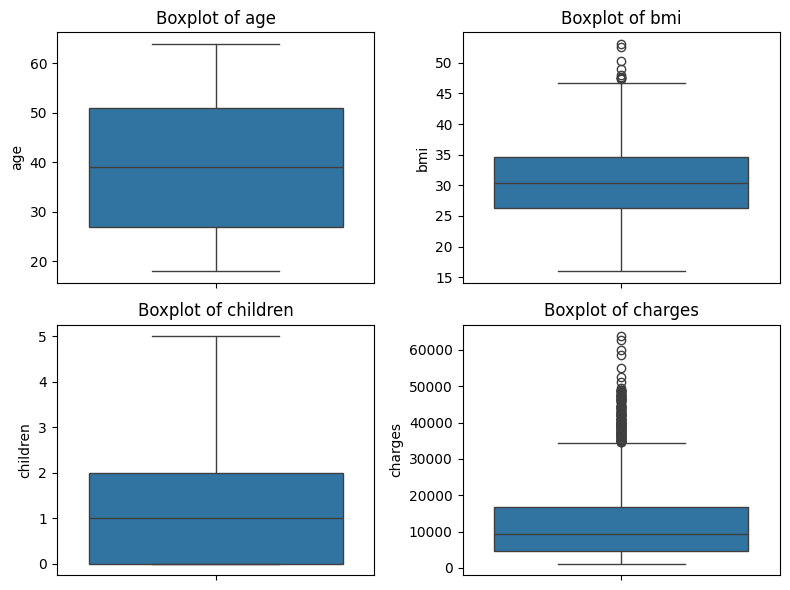

In [289]:
# Columns to check for outliers
columns = ['age', 'bmi', 'children', 'charges']

# Plot box plots for each of the selected columns
plt.figure(figsize=(8, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 plots
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Remove Outliers

In [290]:
from scipy.stats import zscore

# Remove outliers from 'charges' using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'charges' is outside the bounds
data_iqr_filtered = data[(data['charges'] >= lower_bound) & (data['charges'] <= upper_bound)]

# Calculate z-scores for 'bmi'
data_iqr_filtered['bmi_zscore'] = zscore(data_iqr_filtered['bmi'])

# Set threshold for z-score 
zscore_threshold = 3

# Filter out rows where 'bmi' z-score exceeds the threshold
data_cleaned = data_iqr_filtered[abs(data_iqr_filtered['bmi_zscore']) <= zscore_threshold]

# Drop the temporary z-score column
data_cleaned.drop(columns=['bmi_zscore'], inplace=True)
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing 'charges' outliers using IQR: {data_iqr_filtered.shape}")
print(f"Data shape after removing 'bmi' outliers using Z-Score: {data_cleaned.shape}")
data_cleaned.head()

Original data shape: (1337, 7)
Data shape after removing 'charges' outliers using IQR: (1198, 8)
Data shape after removing 'bmi' outliers using Z-Score: (1195, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Encoding and Scaling

In [291]:
# Part 1: Encode and Scale Data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical and numerical columns
categorical_columns = ["sex", "region"]
numerical_columns = ["age", "bmi", "children", "charges"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(drop="first"), categorical_columns)
    ]
)

# Transform features
X_transformed = preprocessor.fit_transform(data_cleaned)

# Supervised Model Building(Random Forest)

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define target and features after encoding and scaling
X = X_transformed
y = data_cleaned["smoker"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report of Random Forest:\n", report)

Accuracy: 0.9456066945606695
Classification Report of Random Forest:
               precision    recall  f1-score   support

          no       0.97      0.97      0.97       209
         yes       0.77      0.80      0.79        30

    accuracy                           0.95       239
   macro avg       0.87      0.88      0.88       239
weighted avg       0.95      0.95      0.95       239



# Logistic Regression

In [293]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_resampled, y_train_resampled)

# Predict with Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report of Logistic Regression:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression:
Accuracy: 0.9414225941422594
Classification Report of Logistic Regression:
               precision    recall  f1-score   support

          no       1.00      0.93      0.97       209
         yes       0.68      1.00      0.81        30

    accuracy                           0.94       239
   macro avg       0.84      0.97      0.89       239
weighted avg       0.96      0.94      0.95       239



# Gradient Boosting Classifier

In [315]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import learning_curve

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report of GradientBoostingClassifier:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting:
Accuracy: 0.9874476987447699
Classification Report of GradientBoostingClassifier:
               precision    recall  f1-score   support

          no       1.00      0.99      0.99       209
         yes       0.94      0.97      0.95        30

    accuracy                           0.99       239
   macro avg       0.97      0.98      0.97       239
weighted avg       0.99      0.99      0.99       239



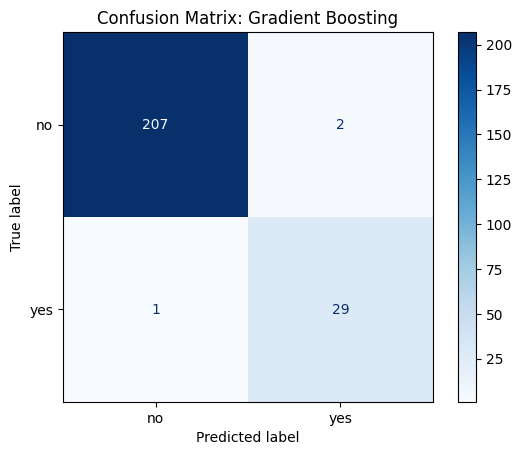

In [312]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb, labels=gb_model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Gradient Boosting")
plt.show()

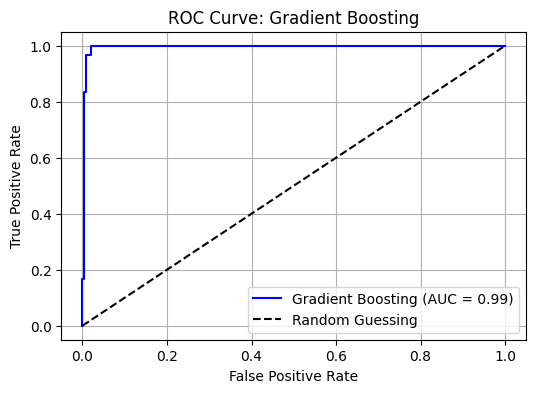

In [316]:
# ROC Curve of GradientBoostingClassifier
y_proba = gb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test.map({'no': 0, 'yes': 1}), y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Gradient Boosting")
plt.legend(loc="lower right")
plt.grid()
plt.show()

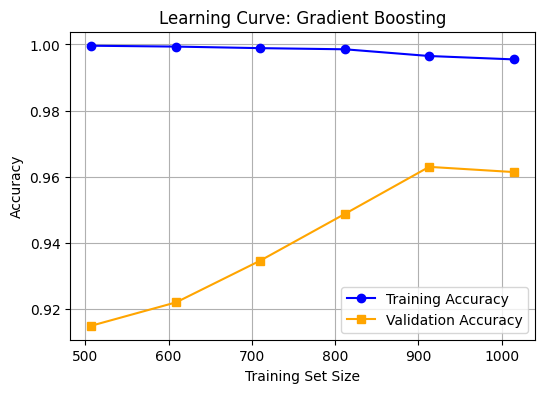

In [317]:
# Learning Curve of GradientBoostingClassifier
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy", color="orange", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Gradient Boosting")
plt.legend(loc="best")
plt.grid()
plt.show()

# Prediction based on Gradient Boosting Classifier

In [320]:
# Function to predict smoker status
def predict_smoker_status(age, sex, bmi, children, charges, region):
    # Create a DataFrame for the new data point
    input_data = pd.DataFrame({
        "age": [age],
        "sex": [sex],
        "bmi": [bmi],
        "children": [children],
        "charges": [charges],
        "region": [region]
    })

    # Apply the same preprocessing to the input data
    input_transformed = preprocessor.transform(input_data)

    # Predict smoker status
    prediction = gb_model.predict(input_transformed)
    probability = gb_model.predict_proba(input_transformed)[:, 1]  # Probability of being a smoker

    # Output the result
    if prediction[0] == "yes":
        print(f"The individual is predicted to be a smoker with a probability of {probability[0]:.2f}")
    else:
        print(f"The individual is predicted to be a non-smoker with a probability of {1 - probability[0]:.2f}")

# Example usage
# Input values: age, sex, bmi, children, charges, region
predict_smoker_status(age=30, sex="female", bmi=25.5, children=2, charges=12000, region="southeast")


The individual is predicted to be a non-smoker with a probability of 1.00


# Unsupervised Model Building (Clustering Technique)

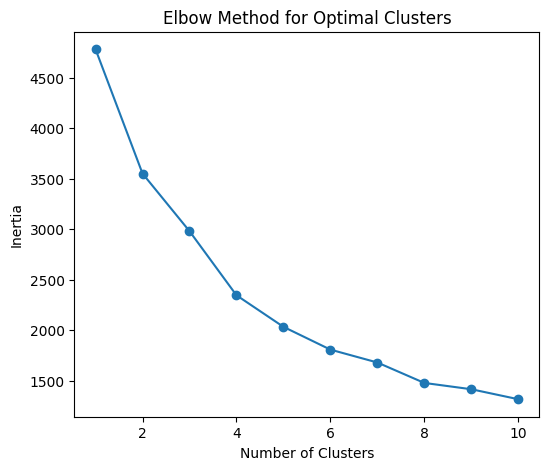

In [308]:
from sklearn.cluster import KMeans

# Exclude categorical columns (e.g., `sex`, `smoker`, `region`) and the target column (`charges`)
numerical_columns = ["age", "bmi", "children", "charges"]
data_numerical = data_cleaned[numerical_columns]

# Scale the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Apply K-Means Clustering to find optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

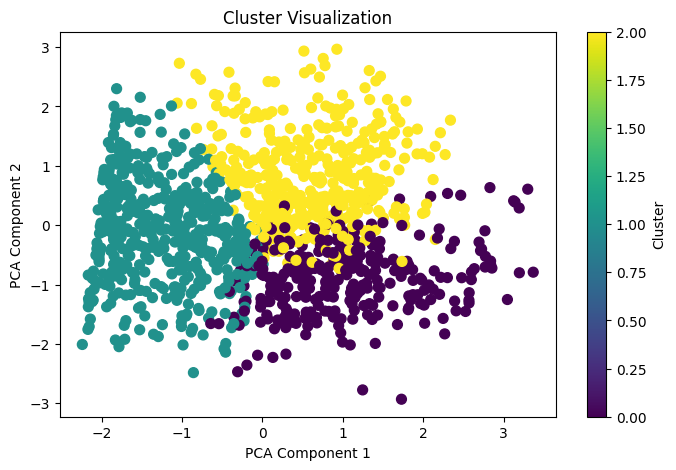

In [309]:
from sklearn.decomposition import PCA
# Fit K-Means with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize Clusters (Using PCA for dimensionality reduction)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_cleaned['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()

In [310]:
# Selecting numeric columns and the 'Cluster' column for profiling
numeric_columns = ['age', 'bmi', 'children', 'charges']
cluster_profiles = data_cleaned[numeric_columns + ['Cluster']].groupby('Cluster').mean()
print("Cluster Profiles (Numeric Columns):")
print(cluster_profiles)

# Grouping categorical columns by cluster
cluster_categoricals = data_cleaned.groupby('Cluster')[['sex', 'smoker', 'region']].apply(lambda x: x.mode())
print("\nCluster Profiles (Categorical Columns):")
print(cluster_categoricals)

# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, data_cleaned['Cluster'])
print("\nSilhouette Score:", silhouette_avg)

Cluster Profiles (Numeric Columns):
               age        bmi  children       charges
Cluster                                              
0        44.644013  26.032427  1.161812  18429.276372
1        26.977131  28.541892  0.856549   4318.915214
2        49.037037  34.884728  1.303704  10159.776065

Cluster Profiles (Categorical Columns):
              sex smoker     region
Cluster                            
0       0  female     no  northeast
1       0  female     no  northwest
2       0  female     no  southeast

Silhouette Score: 0.24225805752805998
